<a href="https://colab.research.google.com/github/twnklstar/PMA/blob/main/Kelompok_13_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Oleh kelompok 13 Kelas PMA (C): Bintang, Femi, Dzaky

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras
from numpy import array , hstack
from keras.optimizers import RMSprop

In [ ]:
data = pd.read_csv("https://github.com/twnklstar/PMA/blob/main/Jatim%202015%20-%202022.csv?raw=true",
                   index_col='datetime', parse_dates=['datetime'])
data.head()

,total_visitor,total_accomodation
datetime,,
2014-01-01,16870,17382
2014-02-01,16476,17592
2014-03-01,18776,18192
2014-04-01,19145,18472
2014-05-01,20299,18790


In [ ]:
data.isna().sum()

total_visitor         0
total_accomodation    0
dtype: int64

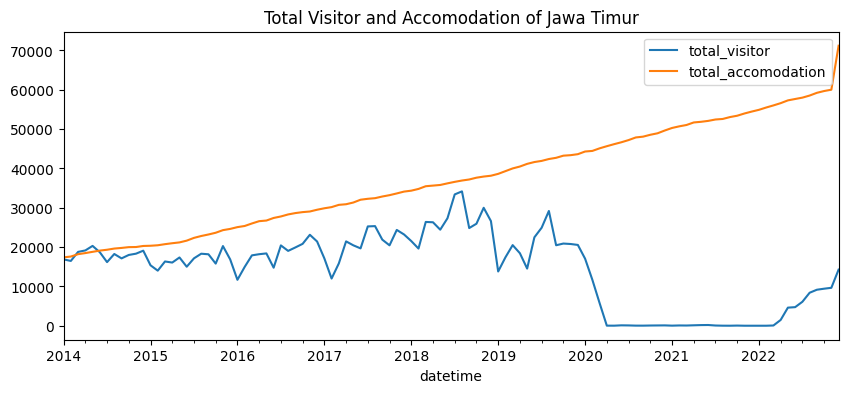

In [ ]:
data.plot(figsize=(10,4),legend=True)
plt.title('Total Visitor and Accomodation of Jawa Timur')
plt.show()

In [ ]:
#normalisasi biar gk bias
scaler = MinMaxScaler(feature_range=(0, 1))

data_scaled = data
data_scaled["total_visitor"] = scaler.fit_transform(data["total_visitor"].values.reshape(-1,1))
data_scaled["total_accomodation"] = scaler.fit_transform(data["total_accomodation"].values.reshape(-1,1))

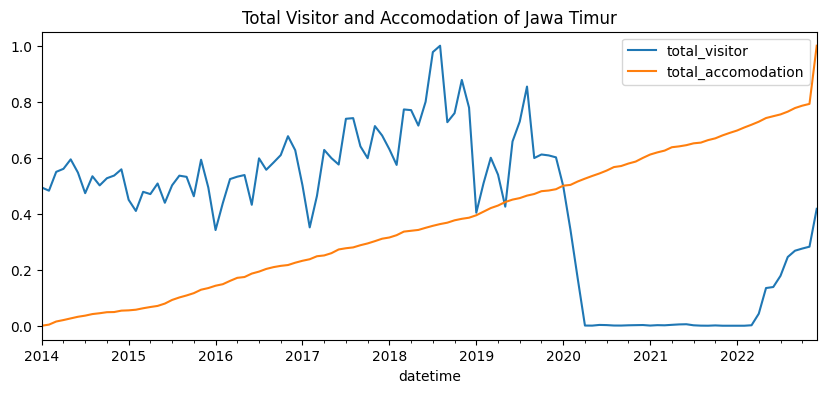

In [ ]:
data_scaled.plot(figsize=(10,4),legend=True)
plt.title('Total Visitor and Accomodation of Jawa Timur')
plt.show()

# Skenario 1 (80:20)

In [ ]:
def data_prep(data, length):

    X = []
    y = []

    for i in range(length, len(data)):
        X.append(data.iloc[i - length: i, 0])
        y.append(data.iloc[i, 0])

    # train-test split
    data_train = int(0.8 * len(data))

    # training contains first 110000 days and test contains the remaining 6189 days

    train_X = X[0:data_train]
    train_y = y[0:data_train]
    test_X = X[data_train:]
    test_y = y[data_train:]

    # converting to numpy array

    train_X = np.array(train_X)
    train_y = np.array(train_y)
    test_X = np.array(test_X)
    test_y = np.array(test_y)

    # reshaping data to required format to input to RNN,LSTM models

    train_X = np.reshape(train_X, (train_X.shape[0], length, 1))
    test_X = np.reshape(test_X, (test_X.shape[0], length, 1))
    return [train_X, train_y, test_X, test_y]

In [ ]:
sequence_length = 12
train_X, train_y, test_X, test_y = data_prep(data_scaled,sequence_length)
print('train_X.shape = ',train_X.shape)
print('train_y.shape = ', train_y.shape)
print('test_X.shape = ', test_X.shape)
print('test_y.shape = ',test_y.shape)

train_X.shape =  (86, 12, 1)
train_y.shape =  (86,)
test_X.shape =  (10, 12, 1)
test_y.shape =  (10,)


## Model

In [ ]:
model_1 = Sequential()

model_1.add(GRU(32, input_shape=(12, 1)))
model_1.add(Dense(units = 512, activation = 'relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(units = 1, activation = 'linear'))
model_1.summary()

model_1.compile(loss='mean_squared_error', optimizer=RMSprop(lr = 0.01))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 32)                3360      
                                                                 
 dense_24 (Dense)            (None, 512)               16896     
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 513       
                                                                 
Total params: 20,769
Trainable params: 20,769
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 32)                3360      
                                                                 
 dense_24 (Dense)            (None, 512)               16896     
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 513       
                                                                 
Total params: 20,769
Trainable params: 20,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(optimizer="adam",loss="MSE")

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_1.fit(test_X, test_y, epochs=100, batch_size=10, validation_split=0.2,
    callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.0321 - val_loss: 0.0928
Epoch 2/100
1/1 [==============================] - 0s 51ms/step - loss: 0.0237 - val_loss: 0.0730
Epoch 3/100
1/1 [==============================] - 0s 52ms/step - loss: 0.0182 - val_loss: 0.0559
Epoch 4/100
1/1 [==============================] - 0s 66ms/step - loss: 0.0129 - val_loss: 0.0412
Epoch 5/100
1/1 [==============================] - 0s 49ms/step - loss: 0.0085 - val_loss: 0.0289
Epoch 6/100
1/1 [==============================] - 0s 72ms/step - loss: 0.0058 - val_loss: 0.0187
Epoch 7/100
1/1 [==============================] - 0s 53ms/step - loss: 0.0033 - val_loss: 0.0112
Epoch 8/100
1/1 [==============================] - 0s 56ms/step - loss: 0.0024 - val_loss: 0.0065
Epoch 9/100
1/1 [==============================] - 0s 53ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 10/100
1/1 [==============================] - 0s 61ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 11/100
1/1 [===

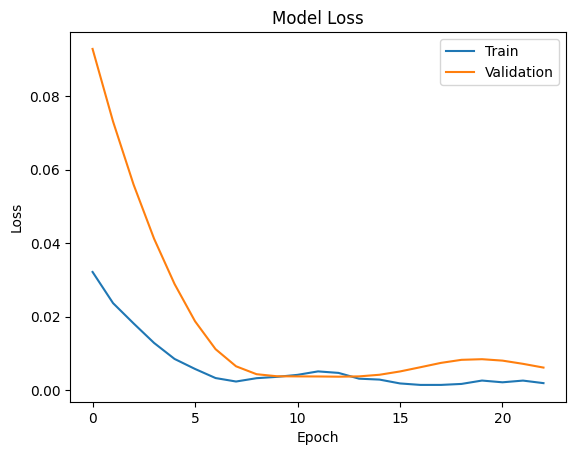

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
predictions = model_1.predict(test_X)

# Inverse transform the scaled predictions to original scale
y_pred = scaler.inverse_transform(predictions)

# Inverse transform the original test set to compare with predictions
y_test = scaler.inverse_transform(test_y.reshape(-1,1))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate evaluation metrics
mae_1 = mean_absolute_error(test_y, predictions)
mse_1 = mean_squared_error(test_y, predictions)
fmape_1 = np.mean(np.abs((mae_1) / predictions)) * 100
mape_1 = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(test_y, predictions)

print("Mean Absolute Error (MAE):", mae_1)
print("Mean Squared Error (MSE):", mse_1)
print("Mean Absolute Percentage Error (MAPE):", mape_1)
print("R2:", r2)

1/1 [==============================] - 0s 428ms/step
Mean Absolute Error (MAE): 0.04665839213618194
Mean Squared Error (MSE): 0.0032779885853821524
Mean Absolute Percentage Error (MAPE): 10.401411467271604
R2: 0.7641699073441028


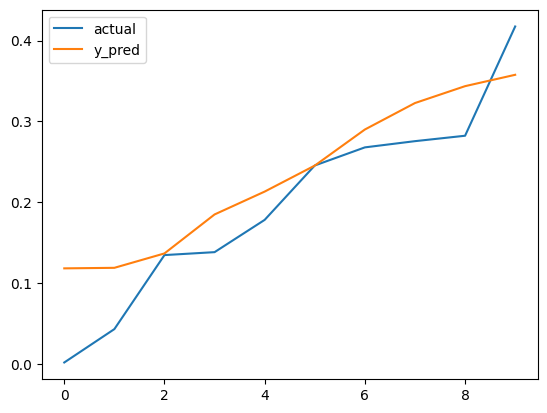

In [ ]:
plt.plot(test_y, label='actual')
plt.plot(predictions, label='y_pred')
plt.legend()

In [ ]:
# Estimate model performance
print()
trainScore = model_1.evaluate(train_X, train_y, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model_1.evaluate(test_X, test_y, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))


3/3 [==============================] - 0s 6ms/step - loss: 0.0188
Train Score: 0.02 MSE (0.14 RMSE)
1/1 [==============================] - 0s 29ms/step - loss: 0.0033
Test Score: 0.00 MSE (0.06 RMSE)


In [ ]:
# Evaluate the skill of the Trained model
trainPredict = model_1.predict(train_X)
testPredict = model_1.predict(test_X)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[sequence_length:len(trainPredict)+sequence_length, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan

# Use the last `sequence_length` values of train data as the starting point for test data
testPredictPlot[:sequence_length, :] = trainPredict[-sequence_length:, :]

# Assign values to the rest of the testPredictPlot
testPredictPlot[sequence_length:len(testPredict)+sequence_length, :] = testPredict

num_prediction = 12

# create a list of dates for next 12 months
date_index = pd.date_range(start='2023-01-01', periods=num_prediction, freq='MS')
date_index = pd.to_datetime(date_index, format="datetime")

# Use the last 12 predictions for creating DataFrame
df_test = pd.DataFrame(testPredictPlot[-num_prediction:, 0], columns=['total_visitor'], index=date_index)

1/1 [==============================] - 0s 24ms/step


## Predict Next 12 Months

In [ ]:
total_vis = data['total_visitor'].values
total_vis = total_vis.reshape((-1))

look_back=12

def predict(num_prediction, model):
    prediction_list = total_vis[-look_back:]

    for i in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]

    return prediction_list

def predict_dates(num_prediction):
    last_date = data.index[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1, freq='MS').tolist()
    return prediction_dates

In [ ]:
num_prediction = 12
forecast_1 = predict(num_prediction, model_1)
forecast_dates_1 = predict_dates(num_prediction)

1/1 [==============================] - 0s 26ms/step


In [ ]:
df_pred= pd.DataFrame({"prediction": forecast_1
                       }, index=forecast_dates_1)

In [ ]:
df_pred

,prediction
2022-12-01,0.417491
2023-01-01,0.416448
2023-02-01,0.448679
2023-03-01,0.478538
2023-04-01,0.506117
2023-05-01,0.531538
2023-06-01,0.554952
2023-07-01,0.576529
2023-08-01,0.596383
2023-09-01,0.614645


## Plotting

In [ ]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual data')
    plt.plot(y_pred, alpha=0.7, color='orange',
    label='Predicted data')
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel('Normalized scale')
    plt.legend()
    plt.show()

In [ ]:
df_pred_1 = df_pred

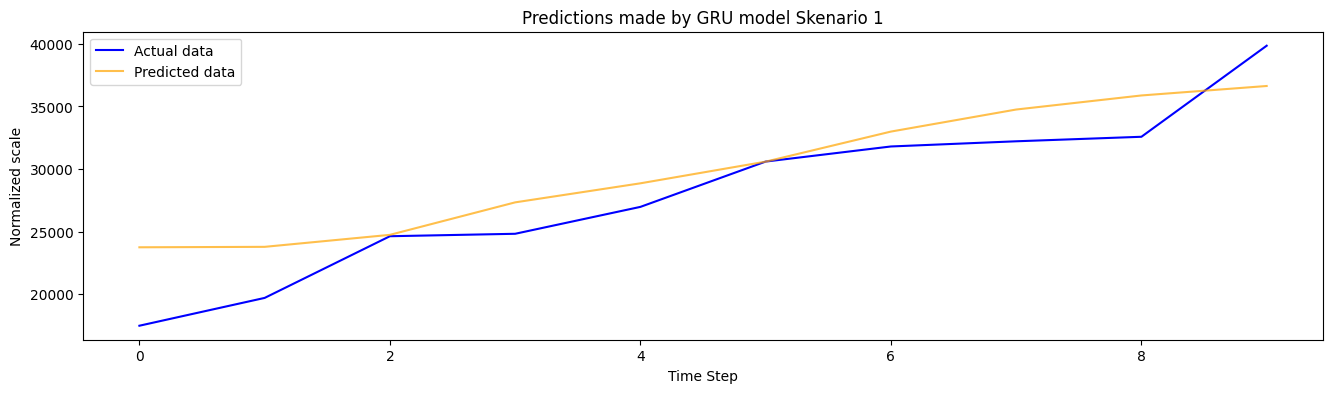

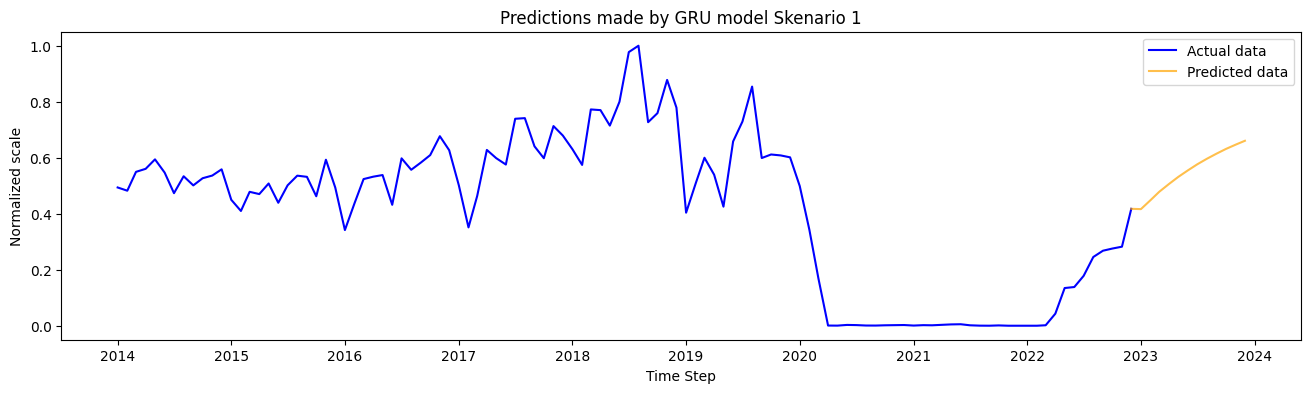

In [ ]:
prediction_1 = plotting_actual_vs_pred(y_test, y_pred, "Predictions made by GRU model Skenario 1")
next_12_month_1 = plotting_actual_vs_pred(data["total_visitor"], df_pred, "Predictions made by GRU model Skenario 1")

# Skenario 2 (70:30)

In [ ]:
def data_prep(data, length):

    X = []
    y = []

    for i in range(length, len(data)):
        X.append(data.iloc[i - length: i, 0])
        y.append(data.iloc[i, 0])

    # train-test split
    data_train = int(0.7 * len(data))

    # training contains first 110000 days and test contains the remaining 6189 days

    train_X = X[0:data_train]
    train_y = y[0:data_train]
    test_X = X[data_train:]
    test_y = y[data_train:]

    # converting to numpy array

    train_X = np.array(train_X)
    train_y = np.array(train_y)
    test_X = np.array(test_X)
    test_y = np.array(test_y)

    # reshaping data to required format to input to RNN,LSTM models

    train_X = np.reshape(train_X, (train_X.shape[0], length, 1))
    test_X = np.reshape(test_X, (test_X.shape[0], length, 1))
    return [train_X, train_y, test_X, test_y]

In [ ]:
sequence_length = 12
train_X, train_y, test_X, test_y = data_prep(data_scaled,sequence_length)
print('train_X.shape = ',train_X.shape)
print('train_y.shape = ', train_y.shape)
print('test_X.shape = ', test_X.shape)
print('test_y.shape = ',test_y.shape)

train_X.shape =  (75, 12, 1)
train_y.shape =  (75,)
test_X.shape =  (21, 12, 1)
test_y.shape =  (21,)


## Model

In [ ]:
model_2 = Sequential()

model_2.add(GRU(32, input_shape=(12, 1)))
model_2.add(Dense(units = 512, activation = 'relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(units = 1, activation = 'linear'))
model_2.summary()

model_2.compile(loss='mean_squared_error', optimizer=RMSprop(lr = 0.01))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_13 (GRU)                (None, 32)                3360      
                                                                 
 dense_26 (Dense)            (None, 512)               16896     
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 513       
                                                                 
Total params: 20,769
Trainable params: 20,769
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_13 (GRU)                (None, 32)                3360      
                                                                 
 dense_26 (Dense)            (None, 512)               16896     
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 513       
                                                                 
Total params: 20,769
Trainable params: 20,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(optimizer="adam",loss="MSE")

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_2.fit(test_X, test_y, epochs=10, batch_size=10, validation_split=0.2,
    callbacks=[early_stopping])

Epoch 1/10
2/2 [==============================] - 4s 533ms/step - loss: 0.0037 - val_loss: 0.0614
Epoch 2/10
2/2 [==============================] - 0s 48ms/step - loss: 0.0028 - val_loss: 0.0423
Epoch 3/10
2/2 [==============================] - 0s 43ms/step - loss: 0.0022 - val_loss: 0.0328
Epoch 4/10
2/2 [==============================] - 0s 43ms/step - loss: 0.0019 - val_loss: 0.0252
Epoch 5/10
2/2 [==============================] - 0s 59ms/step - loss: 0.0018 - val_loss: 0.0189
Epoch 6/10
2/2 [==============================] - 0s 44ms/step - loss: 0.0014 - val_loss: 0.0148
Epoch 7/10
2/2 [==============================] - 0s 42ms/step - loss: 0.0013 - val_loss: 0.0116
Epoch 8/10
2/2 [==============================] - 0s 42ms/step - loss: 0.0013 - val_loss: 0.0072
Epoch 9/10
2/2 [==============================] - 0s 43ms/step - loss: 9.5903e-04 - val_loss: 0.0041
Epoch 10/10
2/2 [==============================] - 0s 43ms/step - loss: 0.0011 - val_loss: 0.0028


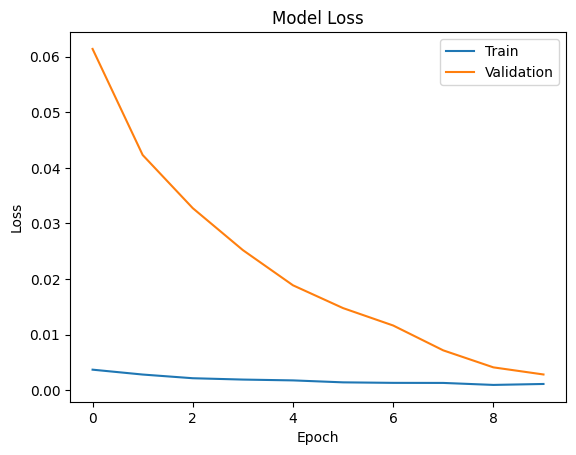

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
predictions = model_2.predict(test_X)

# Inverse transform the scaled predictions to original scale
y_pred = scaler.inverse_transform(predictions)

# Inverse transform the original test set to compare with predictions
y_test = scaler.inverse_transform(test_y.reshape(-1,1))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate evaluation metrics
mae_2 = mean_absolute_error(test_y, predictions)
mse_2 = mean_squared_error(test_y, predictions)
fmape_2 = np.mean(np.abs((mae_2) / predictions)) * 100
mape_2 = mean_absolute_percentage_error(y_test, y_pred)
r2_2 = r2_score(test_y, predictions)

print("Mean Absolute Error (MAE):", mae_2)
print("Mean Squared Error (MSE):", mse_2)
print("Mean Absolute Percentage Error (MAPE):", mape_2)
print("R2:", r2_2)

1/1 [==============================] - 0s 439ms/step
Mean Absolute Error (MAE): 0.030064007071518652
Mean Squared Error (MSE): 0.001411447205082839
Mean Absolute Percentage Error (MAPE): 7.217990308209328
R2: 0.9133925760809627


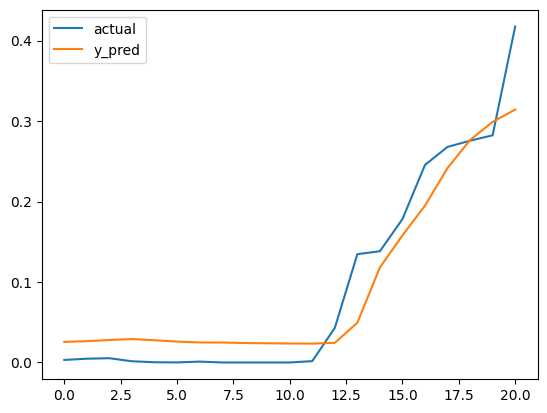

In [ ]:
plt.plot(test_y, label='actual')
plt.plot(predictions, label='y_pred')
plt.legend()

In [ ]:
# Estimate model performance
print()
trainScore = model_2.evaluate(train_X, train_y, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model_2.evaluate(test_X, test_y, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))


3/3 [==============================] - 0s 5ms/step - loss: 0.0154
Train Score: 0.02 MSE (0.12 RMSE)
1/1 [==============================] - 0s 29ms/step - loss: 0.0014
Test Score: 0.00 MSE (0.04 RMSE)


## Predict Next 12 Months

In [ ]:
total_vis = data['total_visitor'].values
total_vis = total_vis.reshape((-1))

look_back=12

def predict(num_prediction, model):
    prediction_list = total_vis[-look_back:]

    for i in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]

    return prediction_list

def predict_dates(num_prediction):
    last_date = data.index[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1, freq='MS').tolist()
    return prediction_dates

In [ ]:
num_prediction = 12
forecast_2 = predict(num_prediction, model_2)
forecast_dates_2 = predict_dates(num_prediction)

1/1 [==============================] - 0s 24ms/step


In [ ]:
df_pred= pd.DataFrame({"prediction": forecast_2
                       }, index=forecast_dates_2)

In [ ]:
df_pred

,prediction
2022-12-01,0.417491
2023-01-01,0.374099
2023-02-01,0.392121
2023-03-01,0.408943
2023-04-01,0.424701
2023-05-01,0.439487
2023-06-01,0.453373
2023-07-01,0.466445
2023-08-01,0.478731
2023-09-01,0.490277


## Plotting

In [ ]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual data')
    plt.plot(y_pred, alpha=0.7, color='orange',
    label='Predicted data')
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel('Normalized scale')
    plt.legend()
    plt.show()

In [ ]:
df_pred_2 = df_pred

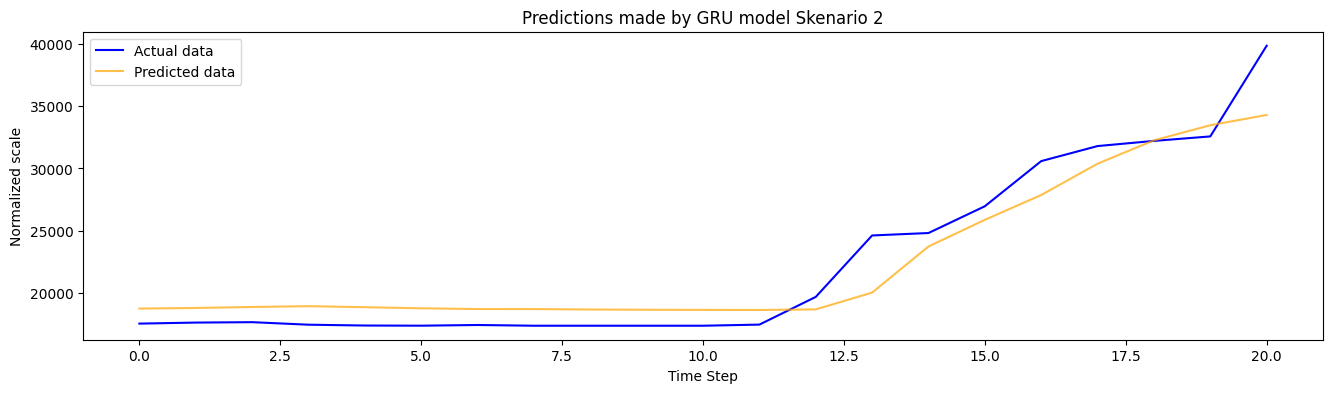

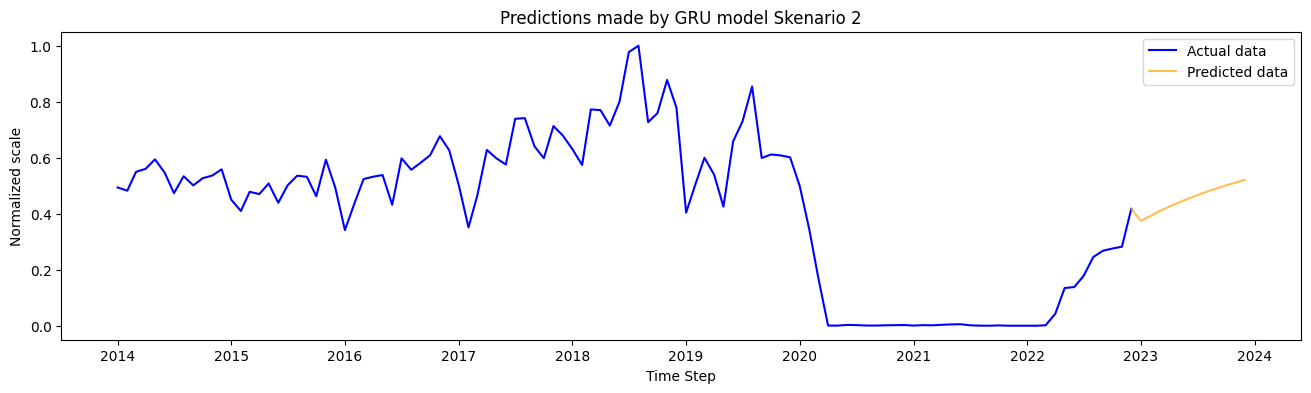

In [ ]:
prediction_2 = plotting_actual_vs_pred(y_test, y_pred, "Predictions made by GRU model Skenario 2")
next_12_month_2 = plotting_actual_vs_pred(data["total_visitor"], df_pred, "Predictions made by GRU model Skenario 2")

# Skenario 3 (60:40)

In [ ]:
def data_prep(data, length):

    X = []
    y = []

    for i in range(length, len(data)):
        X.append(data.iloc[i - length: i, 0])
        y.append(data.iloc[i, 0])

    # train-test split
    data_train = int(0.6 * len(data))

    # training contains first 110000 days and test contains the remaining 6189 days

    train_X = X[0:data_train]
    train_y = y[0:data_train]
    test_X = X[data_train:]
    test_y = y[data_train:]

    # converting to numpy array

    train_X = np.array(train_X)
    train_y = np.array(train_y)
    test_X = np.array(test_X)
    test_y = np.array(test_y)

    # reshaping data to required format to input to RNN,LSTM models

    train_X = np.reshape(train_X, (train_X.shape[0], length, 1))
    test_X = np.reshape(test_X, (test_X.shape[0], length, 1))
    return [train_X, train_y, test_X, test_y]

In [ ]:
sequence_length = 12
train_X, train_y, test_X, test_y = data_prep(data_scaled,sequence_length)
print('train_X.shape = ',train_X.shape)
print('train_y.shape = ', train_y.shape)
print('test_X.shape = ', test_X.shape)
print('test_y.shape = ',test_y.shape)

train_X.shape =  (64, 12, 1)
train_y.shape =  (64,)
test_X.shape =  (32, 12, 1)
test_y.shape =  (32,)


## Model

In [ ]:
model_3 = Sequential()

model_3.add(GRU(32, input_shape=(12, 1)))
model_3.add(Dense(units = 512, activation = 'relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(units = 1, activation = 'linear'))
model_3.summary()

model_3.compile(loss='mean_squared_error', optimizer=RMSprop(lr = 0.01))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 32)                3360      
                                                                 
 dense_28 (Dense)            (None, 512)               16896     
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 1)                 513       
                                                                 
Total params: 20,769
Trainable params: 20,769
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 32)                3360      
                                                                 
 dense_28 (Dense)            (None, 512)               16896     
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 1)                 513       
                                                                 
Total params: 20,769
Trainable params: 20,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.compile(optimizer="adam",loss="MSE")

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_3.fit(test_X, test_y, epochs=100, batch_size=10, validation_split=0.2,
    callbacks=[early_stopping])

Epoch 1/100
3/3 [==============================] - 3s 290ms/step - loss: 7.5704e-04 - val_loss: 0.0621
Epoch 2/100
3/3 [==============================] - 0s 37ms/step - loss: 7.8990e-04 - val_loss: 0.0590
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 7.5341e-04 - val_loss: 0.0628
Epoch 4/100
3/3 [==============================] - 0s 37ms/step - loss: 7.2425e-04 - val_loss: 0.0666
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 6.8338e-04 - val_loss: 0.0651
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 6.6063e-04 - val_loss: 0.0657
Epoch 7/100
3/3 [==============================] - 0s 30ms/step - loss: 7.0490e-04 - val_loss: 0.0671
Epoch 8/100
3/3 [==============================] - 0s 27ms/step - loss: 6.6019e-04 - val_loss: 0.0660
Epoch 9/100
3/3 [==============================] - 0s 27ms/step - loss: 6.2417e-04 - val_loss: 0.0631
Epoch 10/100
3/3 [==============================] - 0s 25ms/step - loss: 6.8149e-

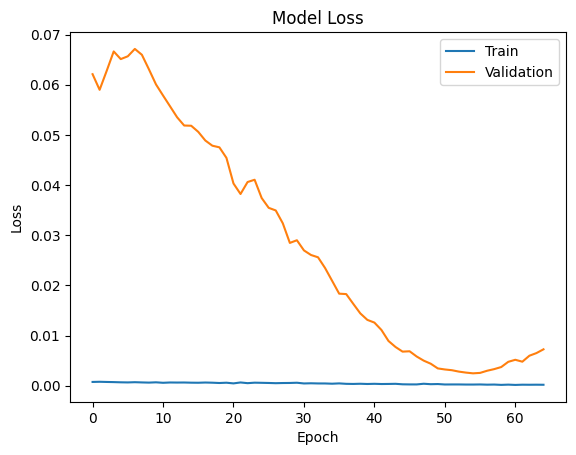

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
predictions = model_3.predict(test_X)

# Inverse transform the scaled predictions to original scale
y_pred = scaler.inverse_transform(predictions)

# Inverse transform the original test set to compare with predictions
y_test = scaler.inverse_transform(test_y.reshape(-1,1))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate evaluation metrics
mae_3 = mean_absolute_error(test_y, predictions)
mse_3 = mean_squared_error(test_y, predictions)
fmape_3 = np.mean(np.abs((mae_3) / predictions)) * 100
mape_3 = mean_absolute_percentage_error(y_test, y_pred)
r2_3 = r2_score(test_y, predictions)

print("Mean Absolute Error (MAE):", mae_3)
print("Mean Squared Error (MSE):", mse_3)
print("Mean Absolute Percentage Error (MAPE):", mape_3)
print("R2:", r2_3)

1/1 [==============================] - 2s 2s/step
Mean Absolute Error (MAE): 0.016594985522393704
Mean Squared Error (MSE): 0.0006893121677624683
Mean Absolute Percentage Error (MAPE): 3.694079227623148
R2: 0.9456234277007346


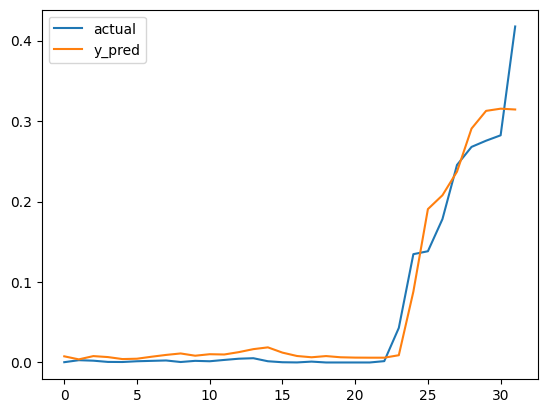

In [ ]:
plt.plot(test_y, label='actual')
plt.plot(predictions, label='y_pred')
plt.legend()

In [ ]:
# Estimate model performance
print()
trainScore = model_3.evaluate(train_X, train_y, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model_3.evaluate(test_X, test_y, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))


2/2 [==============================] - 0s 10ms/step - loss: 0.0163
Train Score: 0.02 MSE (0.13 RMSE)
1/1 [==============================] - 0s 42ms/step - loss: 6.8931e-04
Test Score: 0.00 MSE (0.03 RMSE)


## Predict Next 12 Months

In [ ]:
total_vis = data['total_visitor'].values
total_vis = total_vis.reshape((-1))

look_back=12

def predict(num_prediction, model):
    prediction_list = total_vis[-look_back:]

    for i in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]

    return prediction_list

def predict_dates(num_prediction):
    last_date = data.index[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1, freq='MS').tolist()
    return prediction_dates

In [ ]:
num_prediction = 12
forecast_3 = predict(num_prediction, model_3)
forecast_dates_3 = predict_dates(num_prediction)

1/1 [==============================] - 0s 32ms/step


In [ ]:
df_pred= pd.DataFrame({"prediction": forecast_3
                       }, index=forecast_dates_3)

In [ ]:
df_pred

,prediction
2022-12-01,0.417491
2023-01-01,0.416986
2023-02-01,0.430883
2023-03-01,0.435443
2023-04-01,0.432408
2023-05-01,0.423644
2023-06-01,0.410995
2023-07-01,0.396121
2023-08-01,0.380538
2023-09-01,0.365540


## Plotting

In [ ]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual data')
    plt.plot(y_pred, alpha=0.7, color='orange',
    label='Predicted data')
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel('Normalized scale')
    plt.legend()
    plt.show()

In [ ]:
df_pred_3 = df_pred

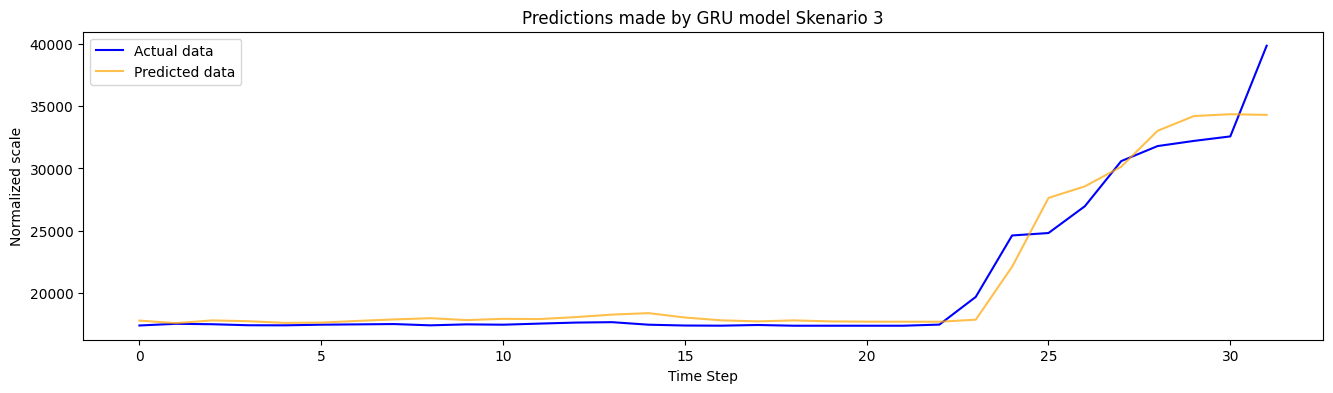

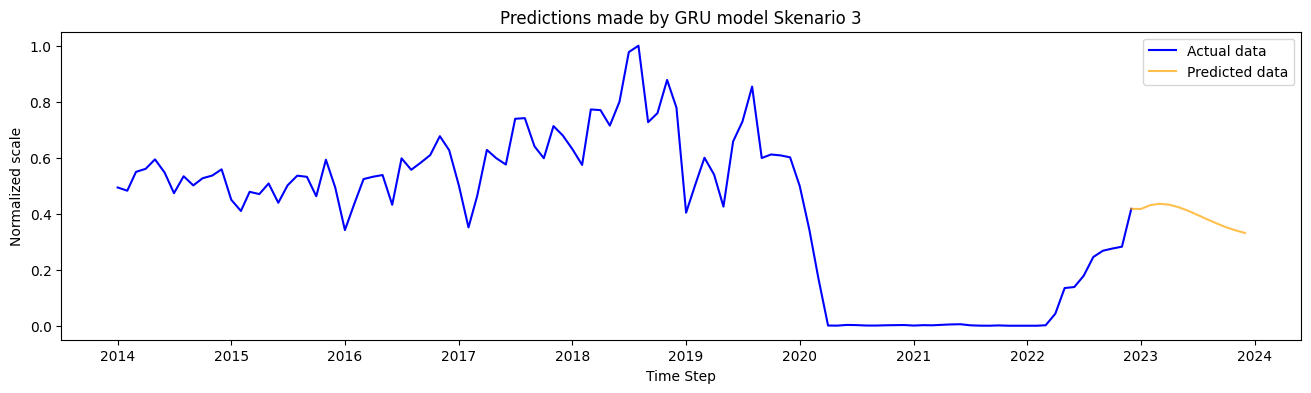

In [ ]:
prediction_3 = plotting_actual_vs_pred(y_test, y_pred, "Predictions made by GRU model Skenario 3")
next_12_month_3 = plotting_actual_vs_pred(data["total_visitor"], df_pred, "Predictions made by GRU model Skenario 3")

# KESIMPULAN

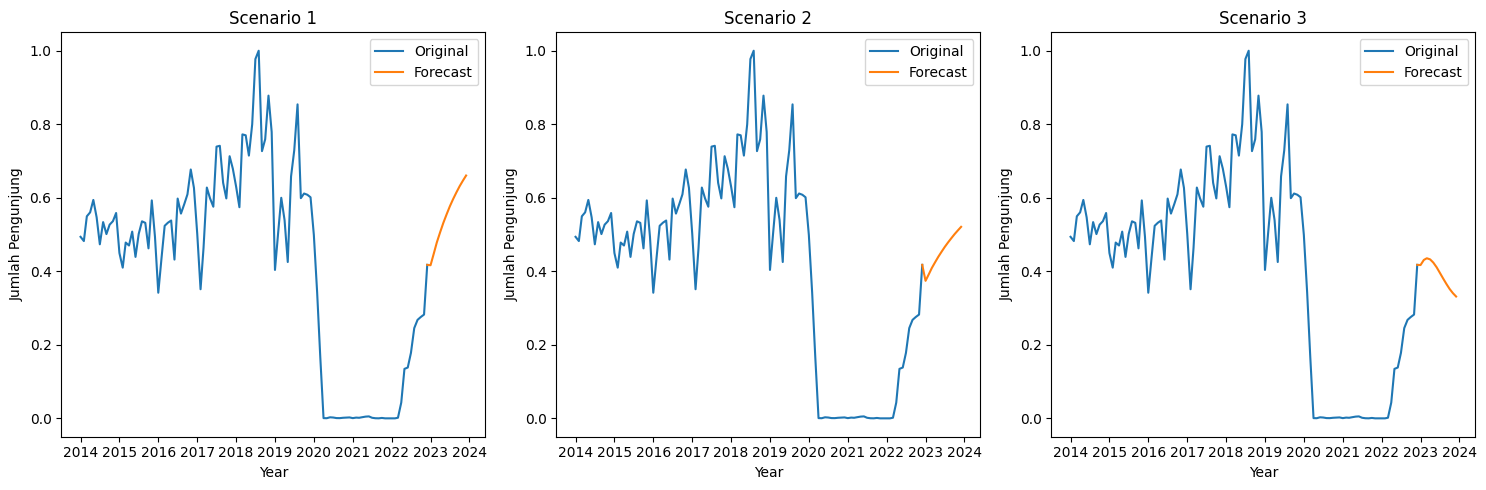

In [ ]:
plt.figure(figsize=(15, 5))

# Scenario 1
plt.subplot(1, 3, 1)
sns.lineplot(data=data, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_pred_1, x=df_pred_1.index, y='prediction', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Jumlah Pengunjung')
plt.title('Scenario 1')
plt.legend()

# Scenario 2
plt.subplot(1, 3, 2)
sns.lineplot(data=data, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_pred_2, x=df_pred_2.index, y='prediction', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Jumlah Pengunjung')
plt.title('Scenario 2')
plt.legend()

# Scenario 3
plt.subplot(1, 3, 3)
sns.lineplot(data=data, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_pred_3, x=df_pred_3.index, y='prediction', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Jumlah Pengunjung')
plt.title('Scenario 3')
plt.legend()

plt.tight_layout()
plt.show()